In [2]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data Science Project /ecommerce_customer_data_large.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Data Science Project /ecommerce_customer_data_custom_ratios.csv')

# Basic Analysis

In [4]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [5]:
df1.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [6]:
df.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0
249999,4148,2020-09-07 05:12:19,Home,307,5,3634,Cash,32,0.0,Angela Norton,32,Male,0


In [7]:
df.shape

(250000, 13)

In [8]:
df1.shape

(250000, 13)

In [9]:
df.isna().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47382
Customer Name,0


In [10]:
df['Returns']

,Returns
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
249995,0.0
249996,1.0
249997,NaN
249998,1.0


In [11]:
df['Returns'].value_counts()

,count
Returns,
1.0,101476
0.0,101142


In [12]:
df['Returns'].fillna(df['Returns'].mean(), inplace=True)

In [13]:
df.isna().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


In [14]:
df1.isna().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [15]:
df1['Returns'].fillna(df['Returns'].mean(), inplace=True)

### 1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?


In [16]:
df.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0


In [17]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [18]:
m_trends = df.groupby('Purchase Date')['Total Purchase Amount'].mean()
m_trends

,Total Purchase Amount
Purchase Date,
2020-01-01 00:07:26,2046.0
2020-01-01 00:11:40,2514.0
2020-01-01 00:15:47,713.0
2020-01-01 00:24:27,4197.0
2020-01-01 00:28:45,5150.0
...,...
2023-09-13 18:02:42,4492.0
2023-09-13 18:16:46,3481.0
2023-09-13 18:33:30,4634.0


In [19]:
sns.barplot(x='Purchase Date',y='Total Purchase Amount',data=df)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7bbc376ce3e0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7bbc376cc040> (for post_execute):


KeyboardInterrupt: 

KeyError: 'y'

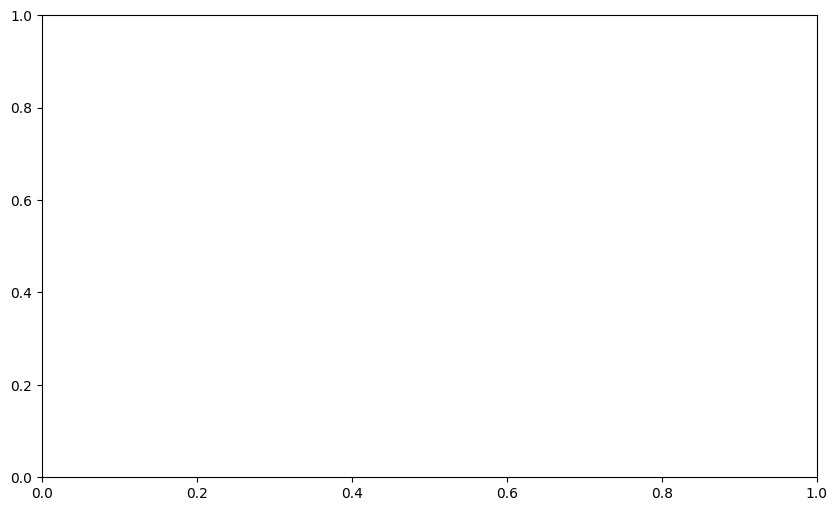

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x= m_trends)

### 2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?


In [19]:
high_rev = df.groupby('Product Category')[['Total Purchase Amount', 'Quantity']].max()
high_rev

,Total Purchase Amount,Quantity
Product Category,,
Books,5345,5
Clothing,5350,5
Electronics,5349,5
Home,5348,5


### 3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?


In [20]:
df.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0


In [21]:
p = df.groupby('Payment Method')['Total Purchase Amount'].max()
p

,Total Purchase Amount
Payment Method,
Cash,5350
Credit Card,5349
PayPal,5344



### 4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?


In [22]:
df.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0


In [23]:
top = df.groupby('Customer ID')['Total Purchase Amount'].max()
top

,Total Purchase Amount
Customer ID,
1,5148
2,4777
3,4687
4,2959
5,4227
...,...
49996,5214
49997,3619
49998,4764


In [24]:
sns.barplot(x='Customer ID',y='Total Purchase Amount',data=df)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79c76781e3e0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79c76781c040> (for post_execute):


KeyboardInterrupt: 